___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# K Nearest Neighbors Project 

Welcome to the Project!
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.plotly as py
import plotly.graph_objs as go

## Get the Data
**Reading the 'KNN_Project_Data csv file into a dataframe**

In [2]:
try:
    df = pd.read_csv('KNN_Project_Data')
    print('File loaded successfully..')
except:
    print('File not found..')

File loaded successfully..


**Checking the head of the dataframe.**

In [10]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Explanatory Data Analysis

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Using seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

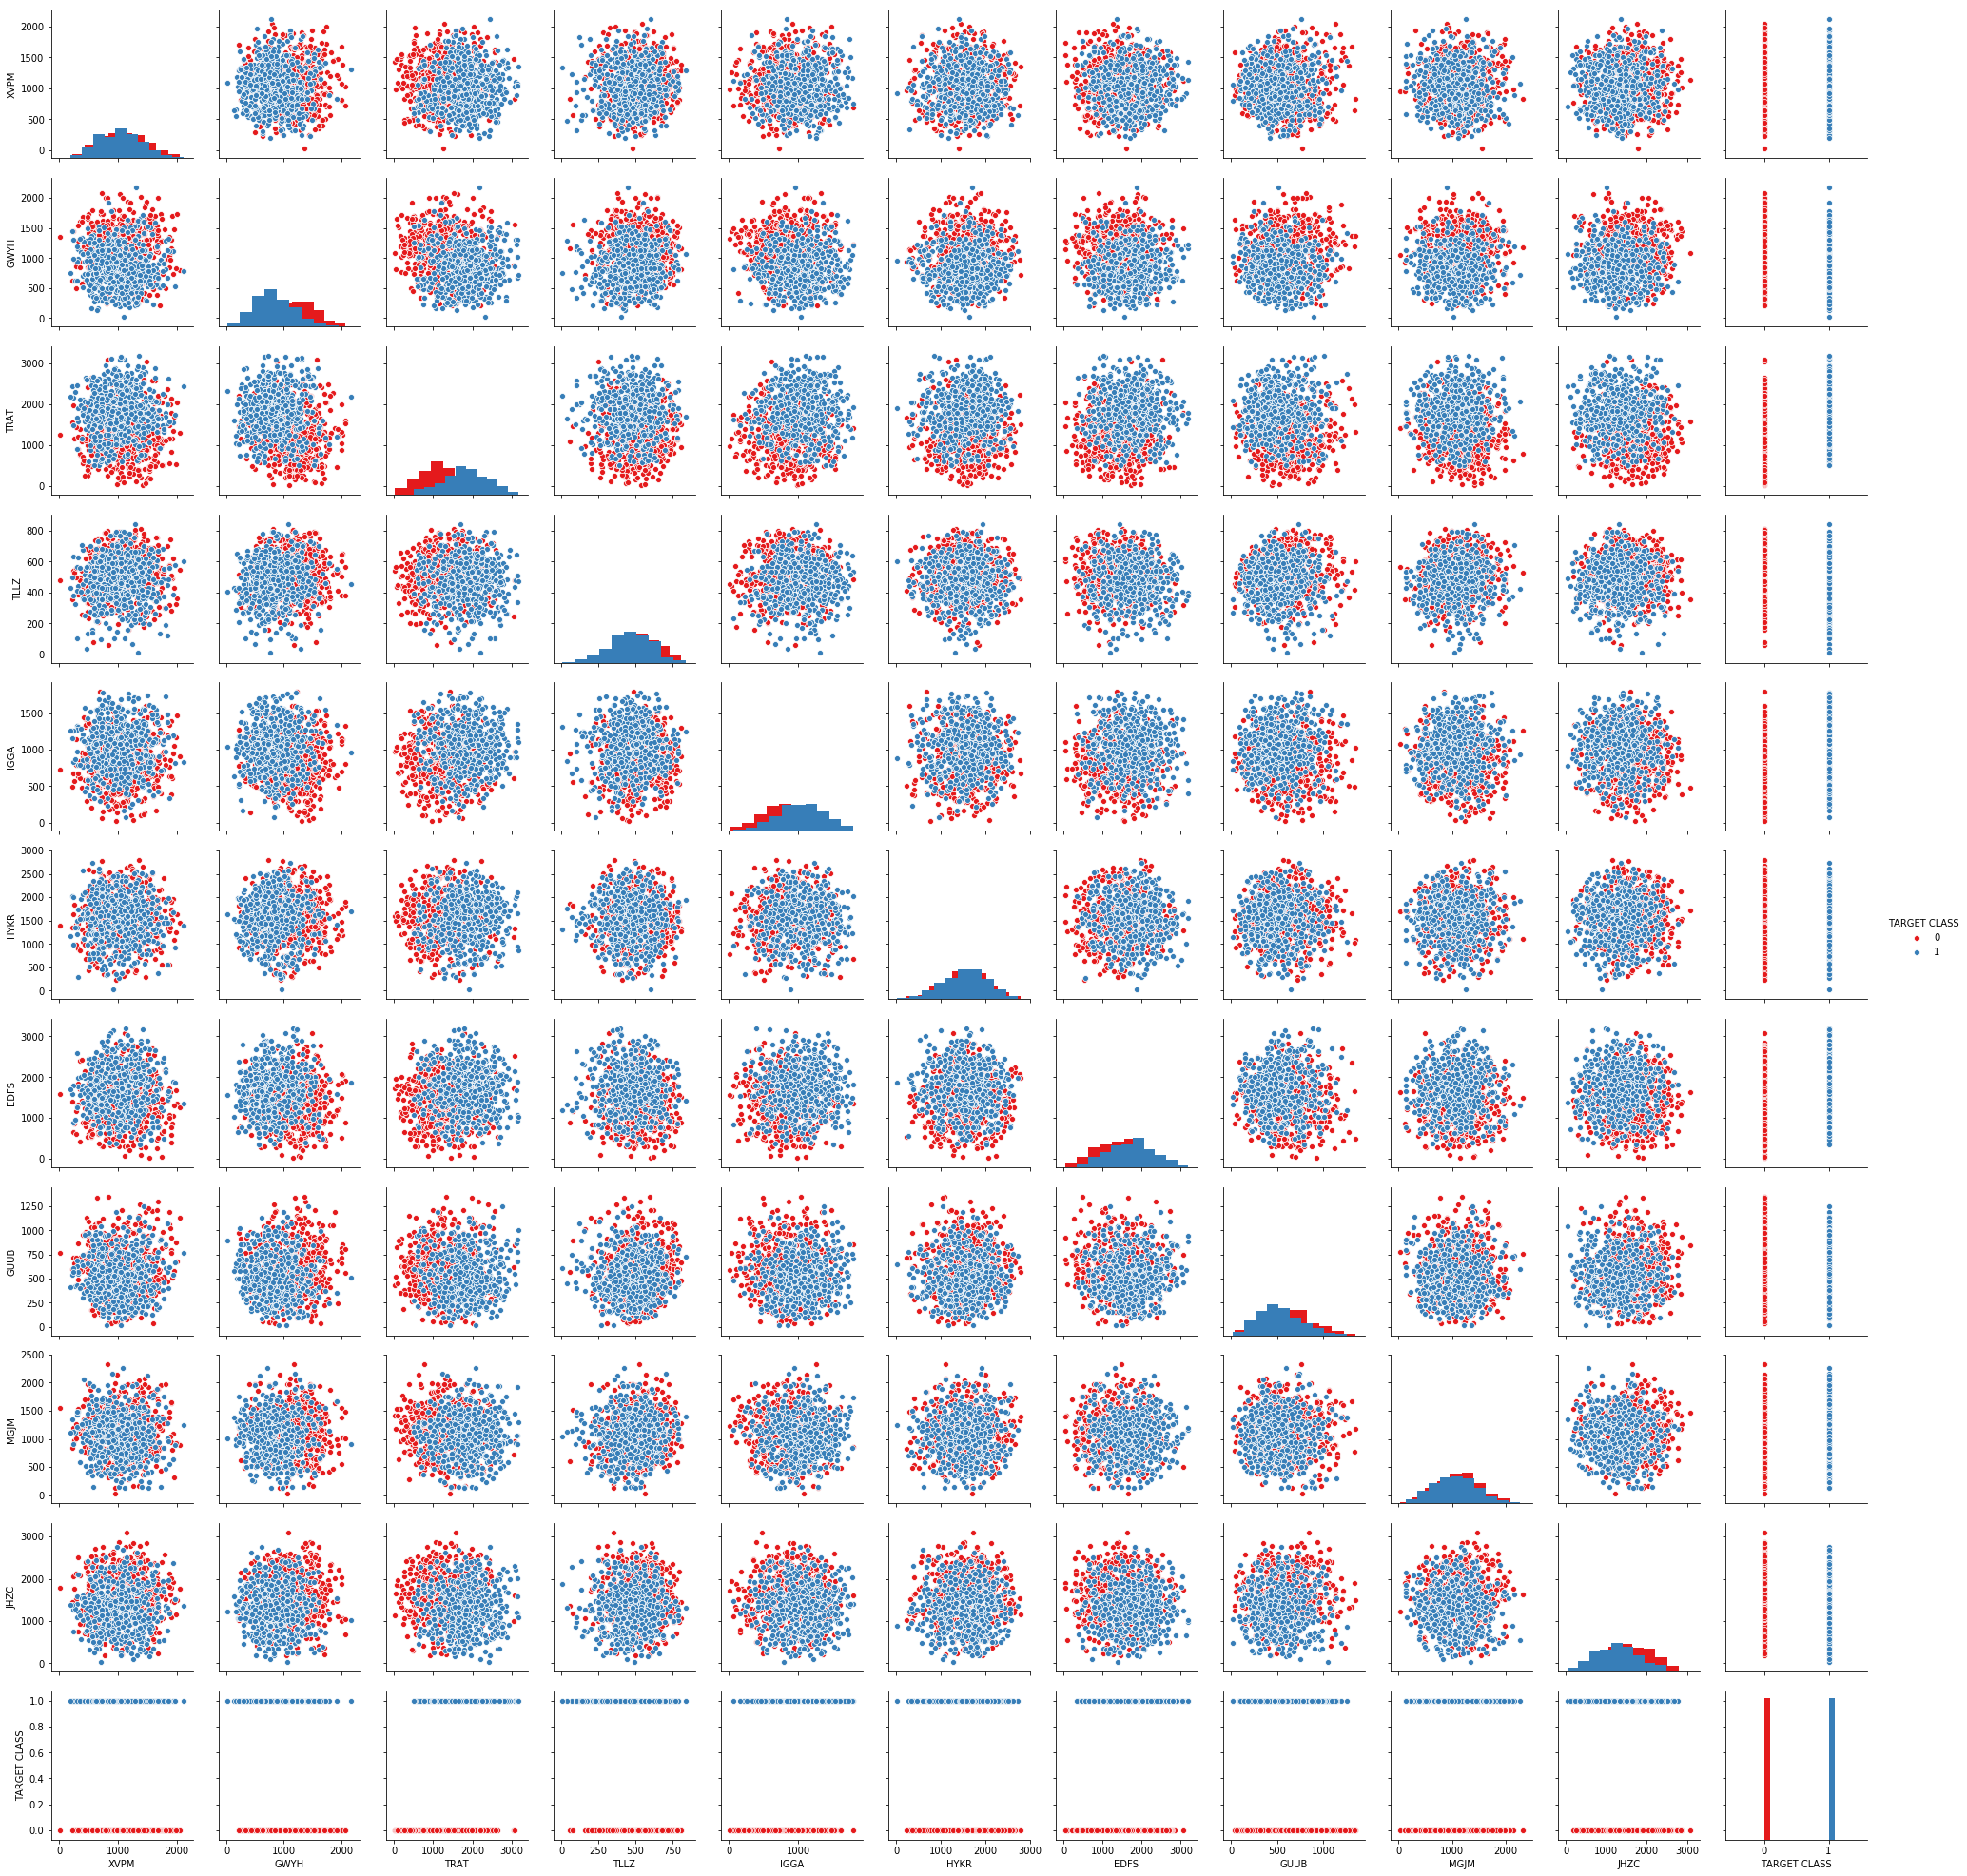

In [13]:
sns.pairplot(data = df,hue = 'TARGET CLASS',diag_kind='hist',palette='Set1')


# Standardize the Variables

Time to standardize the variables.

**Importing StandardScaler from Scikit learn.**

In [14]:
from sklearn.preprocessing import StandardScaler


**Creating a StandardScaler() object called scaler.**

In [15]:
scalar = StandardScaler()

**Fiting scaler to the features.**

In [16]:
scalar.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [19]:
scaled_feature = scalar.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [20]:
scaled_df = pd.DataFrame(scaled_feature,columns=df.columns[:-1])
scaled_df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Using train_test_split to split your data into a training set and a testing set.**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = scaled_df
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing a K Value
**Elbow method to pick a good K Value!**

In [63]:
error_rate = []
for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i= knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

**Now creating the plot of error rate vs k value**

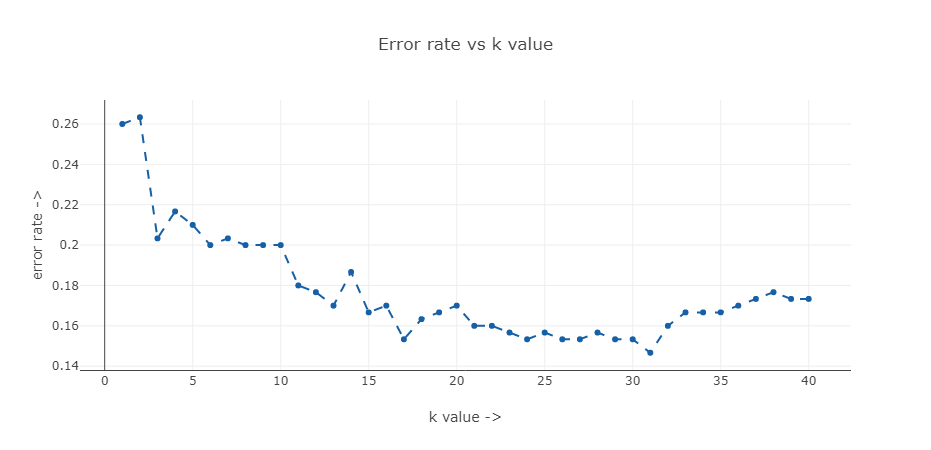

In [62]:
x = [x for x in range(1,41)]
trace = go.Scatter(
    x = x,
    y = error_rate,
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 2,
        dash = 'dash',
    ),
    mode = 'lines+markers'
)

data = [trace]
layout = dict(title = 'Error rate vs k value',
             xaxis= dict(title='k value ->',showline=True), yaxis = dict(title='error rate ->',zeroline=True))
fig = dict(data = data, layout = layout)
iplot(fig, filename='basic-line')

* **k = 31 is a good value for minimum error rate**
* **k = 17 is also a good choice**

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [64]:
# For k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_1 = knn.predict(X_test)

# For k = 17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred_17 = knn.predict(X_test)

# For k = 31
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred_31=knn.predict(X_test)

**Comparison of Classification Report by K Values**

In [67]:
from sklearn.metrics import classification_report

In [68]:
print('k: ',1)
print(classification_report(y_test,pred_1))

k:  1
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       149
           1       0.74      0.74      0.74       151

   micro avg       0.74      0.74      0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



In [69]:
print('k: ',17)
print(classification_report(y_test,pred_17))

k:  17
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       149
           1       0.83      0.88      0.85       151

   micro avg       0.85      0.85      0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



In [72]:
print('k: ',31)
print(classification_report(y_test,pred_31))

k:  31
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       149
           1       0.83      0.89      0.86       151

   micro avg       0.85      0.85      0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

